### Data Source:

[freeCodeCamp.org](https://www.freecodecamp.org/)




---


# Introduction:

In this data set, we have the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03, with one column for date of each day and other for the number of views the forum received on that day.

#### Using this data we will be anayzing the trends and seasonalities for the FCC forum page view.



---





## Importing Necessary Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Reading the CSV data into DataFrame

In [ ]:
df = pd.read_csv('/content/fcc_forum_pageview.csv', parse_dates=['date'], index_col = ['date'])
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933




---


#### Here, we parse date to change them to datetime64[ns] type so that they are easy for maipulation and and make dates the index of the dataframe making the values easier to access.


---



In [ ]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


## Cleaning the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset

In [ ]:
df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]

## Drawing Line Plot

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

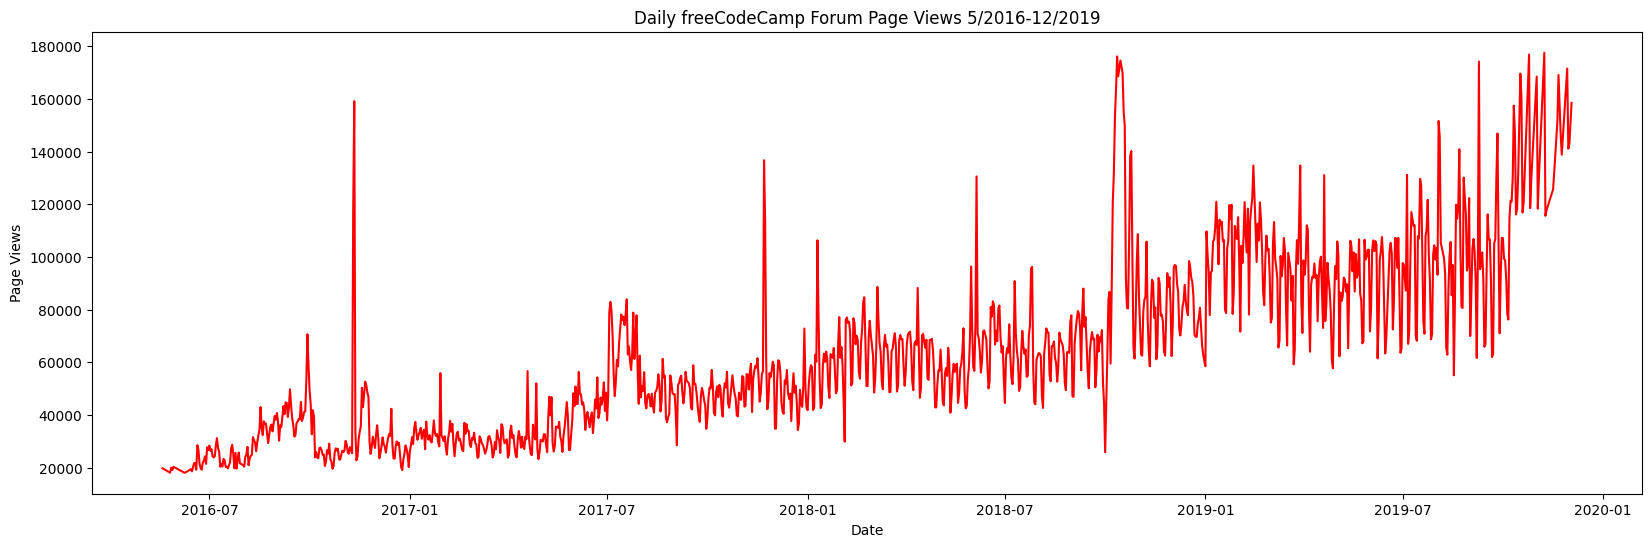

In [ ]:
fig, ax = plt.subplots(figsize = (20, 6))

plt.plot(df.index, df['value'], color = 'r')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')



---



## INSIGHTS:


*   A steady increase in page views from 2016 to 2019 shows that there is growing engagement over time.
*   There is a periodic spike and dip, suggesting potential seasonality in engagement.
*   The increase in views accelerates significantly in 2019 with higher spikes.
*  In late 2016, something caused massive increase in number of page views from its base value.


---




## Bar Plot For Average Page Views Per Month



---


### Manipulating Data To Find Average View Per Month Categorized By Year


---



In [ ]:
df['Month'] = df.index.month #Creating new column as Month
df['Year'] = df.index.year#Creating now column as Year
df_bar = df.groupby(['Year', 'Month'], as_index = False)['value'].mean() #Creating combination of every Year and Month and also finding their mean
df_bar.replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], inplace = True)
df_bar.rename(columns = {"value": "Average Page Views"}, inplace = True)

In [ ]:
df_bar.head()

,Year,Month,Average Page Views
0,2016,May,19432.400000
1,2016,Jun,21875.105263
2,2016,Jul,24109.678571
3,2016,Aug,31049.193548
4,2016,Sep,41476.866667


### Plotting Bar Plot

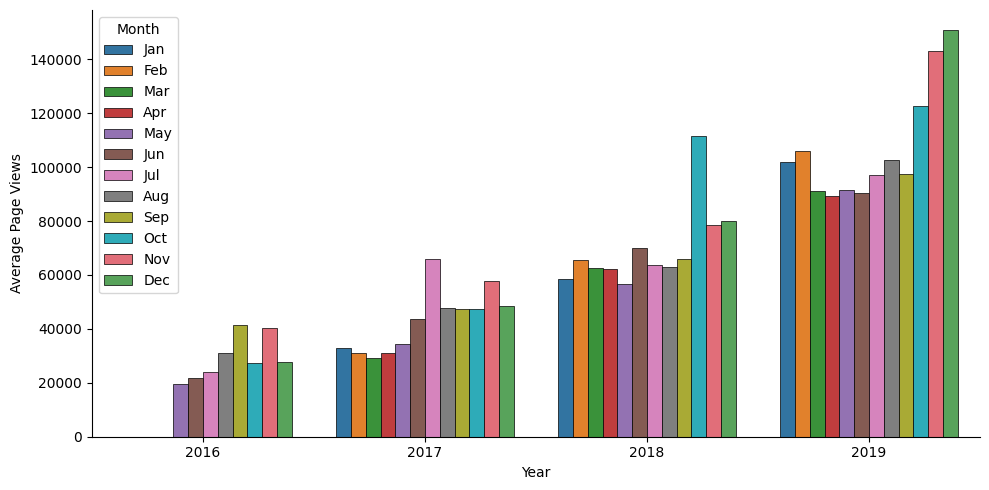

In [ ]:
sns.catplot(data = df_bar, x = 'Year', y = 'Average Page Views', hue = 'Month', kind = 'bar', edgecolor = 'black',
    linewidth = 0.5, palette= ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b",
    "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#f45b69", "#4caf50"], legend_out = False,
    hue_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], height = 5, aspect = 2)



---



## INSIGHTS:


*   Every month shows growth year over year, but rate of increase varies with months like October growing faster compared to others.
*   The bars for 2019 are consistently the highest across all months.
* Months like June, November and December grew by approximately twice the value compared to previous year.


---




# BOX PLOT

In [ ]:
# preparing Data for Box PLot

df_box = df.copy()
df_box.reset_index(inplace = True)
df_box['Month'] = [d.strftime('%b') for d in df_box.date]
df_box.rename(columns = {'value': 'Page Views'}, inplace = True)

In [ ]:
df_box.head()

,date,Page Views,Month,Year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016


## Drawing the Box Plot

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

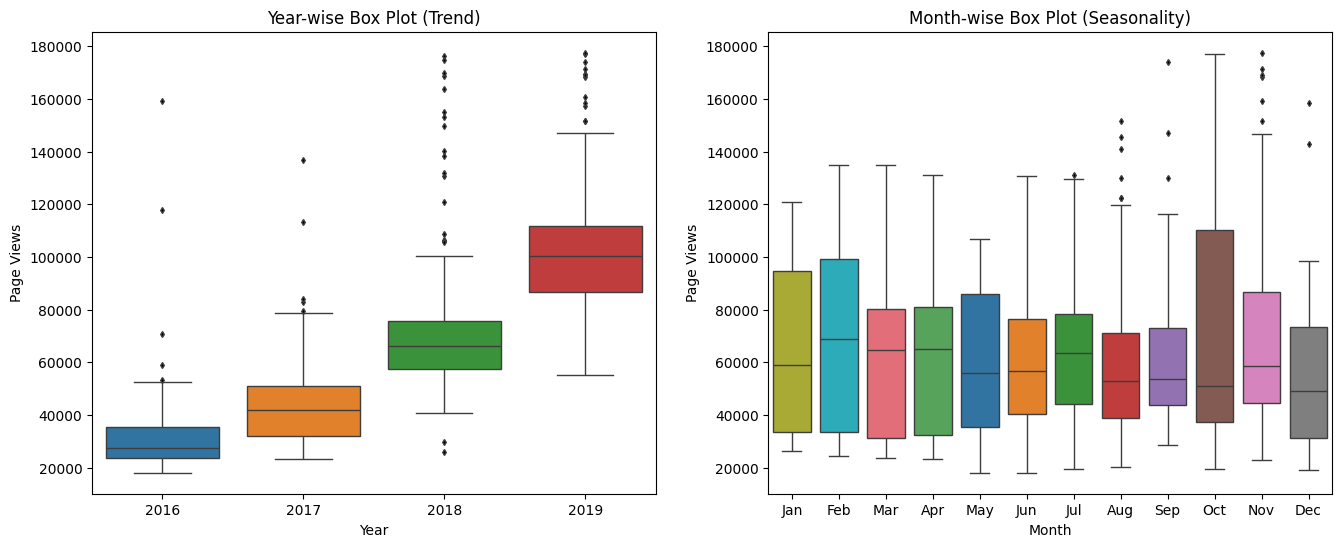

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6)) #creating figure with 1 row and 2 columns to accomodate both plots

# Creatig the First Box Plot
sns.boxplot(data = df_box, x ='Year', y='Page Views',
            ax = ax[0] #Assigning this plot to the 0 index space in the axes of figure created
            , hue = 'Year', legend = False,
            palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"],
            flierprops = {
                'marker' : 'd',
                'markerfacecolor' : 'black',
                'markersize' : 3,
            })

ax[0].set_title('Year-wise Box Plot (Trend)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Page Views')


# Creatig Second Box Plot
sns.boxplot(data = df_box, x = "Month", y = 'Page Views', hue = 'Month', legend = False, ax=ax[1],palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b",
    "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#f45b69", "#4caf50"],
    order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    flierprops = {
        'marker' : 'd',
        'markerfacecolor' : 'black',
        'markersize' : 3,
    })

ax[1].set_xlabel('Month')
ax[1].set_ylabel('Page Views')
ax[1].set_title('Month-wise Box Plot (Seasonality)')



---



## INSIGHTS:

#### Year-Wise Plot:

*  The median page views increase significantly each year, confirming long term growth in popularity.
* The interquartile range (IQR) increases year over year, with 2019 showing the highest variability and more outliers, indicating diverse user engagement.




---



#### Month-Wise Plot:

* Months like October and Novemeber have a high spread above the median, indicating that in these months there is increase in engagement compared to othher months.


---




# CONCLUSION:

#### 1. All graphs together confirm a steady and significant increase in user engagement from 2016 to 2019, with 2019 being the peak year.

#### 2. The data reveals strong seasonality, with October and November performing better than other months.

---



---

